In [1]:
import zipfile
import os

# Step 1: Define the path to the zip file
zip_file_path = "Brain MRI DATA.zip"  # Replace this with the correct file path if necessary
extract_dir = "brain_mri_images/"  # Directory where files will be extracted

# Step 2: Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("File extraction complete.")


File extraction complete.


In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Step 1: Set paths and image processing parameters
image_folder = "brain_mri_images/"  # Path to extracted images
image_size = (128, 128)  # Standard size to resize images
data = []
labels = []

In [3]:
# Step 2: Loop through image folder and load images from 'no' and 'yes' folders
for folder_name in ['no', 'yes']:  # Use 'no' and 'yes' as class labels (no tumor, tumor)
    folder_path = os.path.join(image_folder, folder_name)
    if os.path.isdir(folder_path):
        label = 1 if folder_name == 'yes' else 0  # Assign label 1 for 'yes' (tumor) and 0 for 'no' (no tumor)
        for image_file in os.listdir(folder_path):
            if image_file.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(folder_path, image_file)
                img = Image.open(image_path)
                
                # Ensure all images are in RGB format
                img = img.convert('RGB')
                
                # Resize the image
                img = img.resize(image_size)
                
                # Convert the image to a numpy array and normalize pixel values to [0, 1]
                img_array = np.array(img) / 255.0
                
                # Append image data and corresponding label (0 for 'no', 1 for 'yes')
                data.append(img_array)
                labels.append(label)

In [4]:
# Check the distribution of labels (to make sure both classes are present)
unique, counts = np.unique(labels, return_counts=True)
print(f"Label distribution: {dict(zip(unique, counts))}")


Label distribution: {0: 92, 1: 87}


In [5]:
# Step 3: Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)  # Should be (number of images, 128, 128, 3) if RGB images
print("Labels shape:", labels.shape)  # Should be (number of images,)

Data shape: (179, 128, 128, 3)
Labels shape: (179,)


In [6]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into 70% training and 30% for test+validation
train_data, test_val_data, train_labels, test_val_labels = train_test_split(
    data, labels, test_size=0.30, random_state=42, stratify=labels
)

# Check the shapes after the first split
print(f"test_val_data shape: {test_val_data.shape}")
print(f"test_val_labels shape: {test_val_labels.shape}")

test_val_data shape: (54, 128, 128, 3)
test_val_labels shape: (54,)


In [7]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into 70% training and 30% for test+validation
train_data, test_val_data, train_labels, test_val_labels = train_test_split(
    data, labels, test_size=0.30, random_state=42, stratify=labels
)

# Step 2: Further split test_val_data into validation and test sets (50% each of 30%)
val_data, test_data, val_labels, test_labels = train_test_split(
    test_val_data, test_val_labels, test_size=0.50, random_state=42, stratify=test_val_labels
)

# Print the shapes of the datasets
print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)


Training data shape: (125, 128, 128, 3)
Validation data shape: (27, 128, 128, 3)
Test data shape: (27, 128, 128, 3)


Building CNN Model

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Build the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary crossentropy is appropriate for binary classification
    metrics=['accuracy']         # Track accuracy during training
)


In [10]:
# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_data, 
    train_labels, 
    epochs=10,  # You can adjust the number of epochs based on your need
    batch_size=16,  # Adjust the batch size if needed
    validation_data=(val_data, val_labels),  # Use validation set for validation
    callbacks=[early_stopping]
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.5778 - loss: 0.6760 - val_accuracy: 0.6667 - val_loss: 0.6276
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.6966 - loss: 0.6120 - val_accuracy: 0.7407 - val_loss: 0.5718
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.7668 - loss: 0.5290 - val_accuracy: 0.6667 - val_loss: 0.6235
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.7078 - loss: 0.5384 - val_accuracy: 0.7778 - val_loss: 0.5448
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.7447 - loss: 0.4572 - val_accuracy: 0.7407 - val_loss: 0.5632
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.7856 - loss: 0.3602 - val_accuracy: 0.7407 - val_loss: 0.5557
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.8719 - loss: 0.2869 - val_accuracy: 0.7778 - val_loss: 0.6278


In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8148 - loss: 0.3598
Test Accuracy: 81.48%
Test Loss: 0.3598


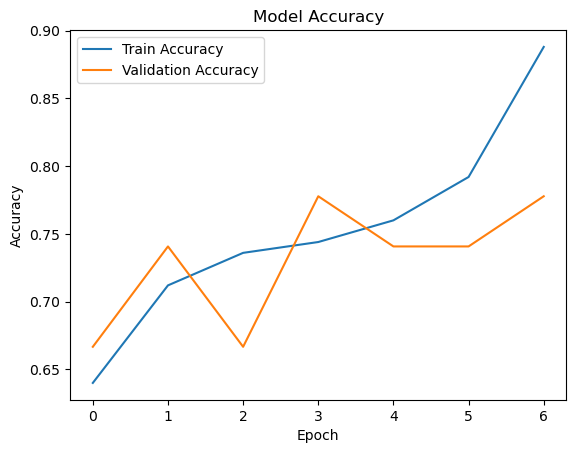

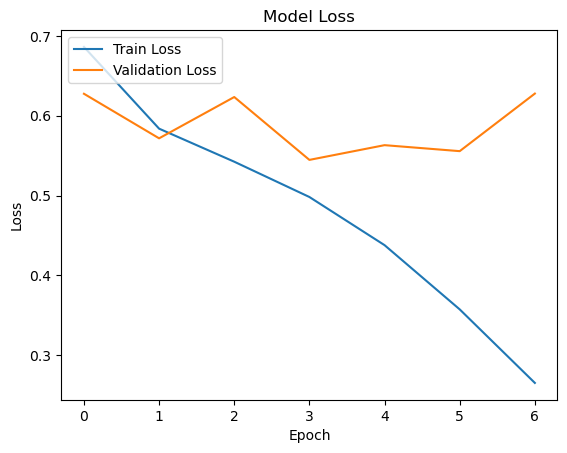

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8148 - loss: 0.3598
Test Accuracy: 81.48%
Test Loss: 0.3598


In [14]:
import numpy as np

# Count the number of instances in each class
unique, counts = np.unique(labels, return_counts=True)
print(f"Label distribution: {dict(zip(unique, counts))}")


Label distribution: {0: 92, 1: 87}


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator on the training data
datagen.fit(train_data)

# Train the model using the data generator
history = model.fit(datagen.flow(train_data, train_labels, batch_size=16),
                    epochs=10,
                    validation_data=(val_data, val_labels),
                    callbacks=[early_stopping])


Epoch 1/10


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - accuracy: 0.5996 - loss: 0.7164 - val_accuracy: 0.7407 - val_loss: 0.5529
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.6820 - loss: 0.5547 - val_accuracy: 0.7407 - val_loss: 0.5266
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.7317 - loss: 0.5744 - val_accuracy: 0.7037 - val_loss: 0.4919
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.6754 - loss: 0.5740 - val_accuracy: 0.7778 - val_loss: 0.5621
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7259 - loss: 0.5696 - val_accuracy: 0.7778 - val_loss: 0.5424
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.6657 - loss: 0.5540 - val_accuracy: 0.8148 - val_loss: 0.4071
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.7588 - loss: 0.5383 - val_accuracy: 0.5926 - val_loss: 0.8434
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.5396 - loss: 0.7373 - val_accuracy: 0.7778 - val_loss: 0.4675
Epo

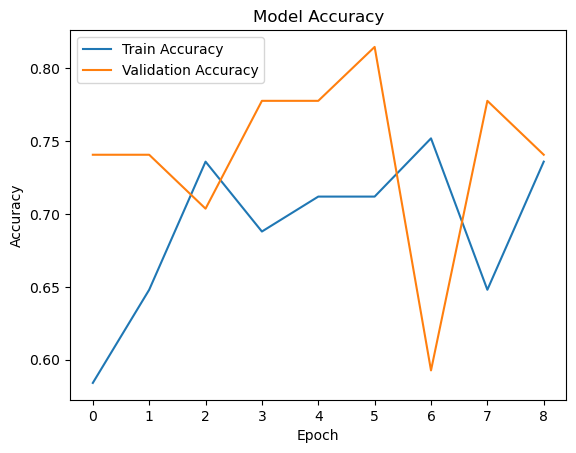

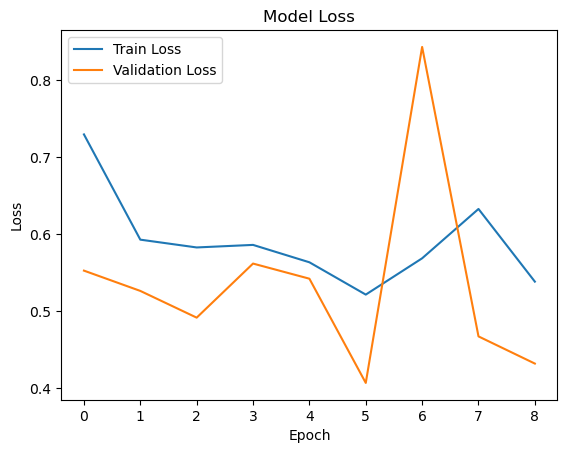

{'train_accuracy': [0.5839999914169312,
  0.6480000019073486,
  0.7360000014305115,
  0.6880000233650208,
  0.7120000123977661,
  0.7120000123977661,
  0.7519999742507935,
  0.6480000019073486,
  0.7360000014305115],
 'val_accuracy': [0.7407407164573669,
  0.7407407164573669,
  0.7037037014961243,
  0.7777777910232544,
  0.7777777910232544,
  0.8148148059844971,
  0.5925925970077515,
  0.7777777910232544,
  0.7407407164573669],
 'train_loss': [0.7297837138175964,
  0.5931345224380493,
  0.5830159783363342,
  0.5863279700279236,
  0.5637494921684265,
  0.5217918157577515,
  0.5689239501953125,
  0.6329912543296814,
  0.5386419892311096],
 'val_loss': [0.5529245734214783,
  0.5265821814537048,
  0.49187204241752625,
  0.5620877742767334,
  0.5424394011497498,
  0.4071202874183655,
  0.8433775305747986,
  0.4675254821777344,
  0.4322355389595032]}

In [16]:
# Plotting training and validation accuracy and loss

# Extract accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training & validation accuracy values
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Output data for training and validation accuracy and loss
history_data = {
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'train_loss': train_loss,
    'val_loss': val_loss
}

history_data


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2, # Randomly shift images vertically by 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.2          # Randomly zoom in on images
)

# Fit the data generator on the training data
datagen.fit(train_data)

# Train the model using the data generator
history_aug = model.fit(datagen.flow(train_data, train_labels, batch_size=16),
                        epochs=10,
                        validation_data=(val_data, val_labels),
                        callbacks=[early_stopping])


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 353ms/step - accuracy: 0.8266 - loss: 0.4670 - val_accuracy: 0.7407 - val_loss: 0.4902
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.7066 - loss: 0.5521 - val_accuracy: 0.7778 - val_loss: 0.4478
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.7516 - loss: 0.5445 - val_accuracy: 0.8889 - val_loss: 0.3989
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.7562 - loss: 0.5036 - val_accuracy: 0.7778 - val_loss: 0.3566
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.7806 - loss: 0.5175 - val_accuracy: 0.8148 - val_loss: 0.3747
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.7958 - loss: 0.4881 - val_accuracy: 0.7778 - val_loss: 0.4200
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.7260 - loss: 0.5133 - val_accuracy: 0.8148 - val_loss: 0.4401


In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7037 - loss: 0.4542
Test Accuracy: 70.37%
Test Loss: 0.4542


In [19]:
from tensorflow.keras import layers, models

# Rebuild the model with Dropout layers
model = models.Sequential()

# Convolutional layers remain the same
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers with Dropout
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout to prevent overfitting

model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dropout regularization
history_dropout = model.fit(datagen.flow(train_data, train_labels, batch_size=16),
                            epochs=10,
                            validation_data=(val_data, val_labels),
                            callbacks=[early_stopping])


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.5082 - loss: 0.7404 - val_accuracy: 0.4815 - val_loss: 0.7002
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.4851 - loss: 0.7096 - val_accuracy: 0.7407 - val_loss: 0.6814
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.5647 - loss: 0.6882 - val_accuracy: 0.6296 - val_loss: 0.6612


In [21]:
from tensorflow.keras import layers, models, Input

# Rebuild the model with the correct Input layer
model = models.Sequential()

# Use Input layer to define the input shape
model.add(Input(shape=(128, 128, 3)))

# Convolutional layers remain the same
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers with Dropout
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test data
predictions = model.predict(test_data)
predictions = (predictions > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(test_labels, predictions)
print("Classification Report:")
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Confusion Matrix:
[[14  0]
 [13  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        14
           1       0.00      0.00      0.00        13

    accuracy                           0.52        27
   macro avg       0.26      0.50      0.34        27
weighted avg       0.27      0.52      0.35        27



C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [26]:
from sklearn.utils import class_weight

# Compute class weights based on the training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

# Convert class weights to a dictionary
class_weights = dict(enumerate(class_weights))

# Train the model using class weights
history_weighted = model.fit(
    datagen.flow(train_data, train_labels, batch_size=16),
    epochs=10,
    validation_data=(val_data, val_labels),
    class_weight=class_weights,  # Pass class weights as a dictionary
    callbacks=[early_stopping]
)


Epoch 1/10


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.5339 - loss: 0.6893 - val_accuracy: 0.4815 - val_loss: 0.6960
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.5307 - loss: 0.6826 - val_accuracy: 0.5185 - val_loss: 0.6757
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.6575 - loss: 0.6634 - val_accuracy: 0.6667 - val_loss: 0.6588


In [27]:
history_weighted = model.fit(
    datagen.flow(train_data, train_labels, batch_size=16),
    epochs=20,  # Increase number of epochs
    validation_data=(val_data, val_labels),
    class_weight=class_weights,  
    callbacks=[early_stopping]
)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.5955 - loss: 0.6621 - val_accuracy: 0.6667 - val_loss: 0.6524
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.7000 - loss: 0.6471 - val_accuracy: 0.6667 - val_loss: 0.6316
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.6850 - loss: 0.6179 - val_accuracy: 0.6667 - val_loss: 0.6066


In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Retrain the model
history_weighted = model.fit(
    datagen.flow(train_data, train_labels, batch_size=16),
    epochs=20,  # Continue with more epochs
    validation_data=(val_data, val_labels),
    class_weight=class_weights,  
    callbacks=[early_stopping]
)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 304ms/step - accuracy: 0.6643 - loss: 0.6235 - val_accuracy: 0.6667 - val_loss: 0.6686
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.6246 - loss: 0.6108 - val_accuracy: 0.6667 - val_loss: 0.6195
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.6346 - loss: 0.6482 - val_accuracy: 0.6296 - val_loss: 0.6061


In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6296 - loss: 0.5872
Test Accuracy: 62.96%
Test Loss: 0.5872


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with more aggressive augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(train_data)

# Train the model using the augmented data
history_aug = model.fit(datagen.flow(train_data, train_labels, batch_size=16),
                        epochs=20,
                        validation_data=(val_data, val_labels),
                        class_weight=class_weights,
                        callbacks=[early_stopping])


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 0.7260 - loss: 0.5578 - val_accuracy: 0.6667 - val_loss: 0.6226
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 393ms/step - accuracy: 0.6044 - loss: 0.6195 - val_accuracy: 0.6296 - val_loss: 0.5748
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.6756 - loss: 0.6258 - val_accuracy: 0.7037 - val_loss: 0.5606


In [31]:
history_aug = model.fit(datagen.flow(train_data, train_labels, batch_size=16),
                        epochs=30,  # Increase epochs to 30 or more
                        validation_data=(val_data, val_labels),
                        class_weight=class_weights,
                        callbacks=[early_stopping])


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 406ms/step - accuracy: 0.6899 - loss: 0.5748 - val_accuracy: 0.6667 - val_loss: 0.6076
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.7645 - loss: 0.5802 - val_accuracy: 0.6296 - val_loss: 0.5766
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step - accuracy: 0.7012 - loss: 0.5851 - val_accuracy: 0.5926 - val_loss: 0.5673


In [32]:
# Build a more complex CNN with additional layers
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(128, 128, 3)))

# Add more convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add a new convolutional layer to capture deeper features
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Increase dense layer size
model.add(layers.Dropout(0.5))  # Regularization

model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the complex architecture
history_complex = model.fit(datagen.flow(train_data, train_labels, batch_size=16),
                            epochs=30,  # Train for more epochs
                            validation_data=(val_data, val_labels),
                            class_weight=class_weights,
                            callbacks=[early_stopping])


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step - accuracy: 0.5071 - loss: 0.7176 - val_accuracy: 0.4815 - val_loss: 0.6906
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 0.5897 - loss: 0.6864 - val_accuracy: 0.4815 - val_loss: 0.6896
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.5719 - loss: 0.6898 - val_accuracy: 0.4815 - val_loss: 0.6939


In [34]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the pre-trained VGG16 base
history_transfer = model.fit(datagen.flow(train_data, train_labels, batch_size=16),
                             epochs=30,
                             validation_data=(val_data, val_labels),
                             class_weight=class_weights,
                             callbacks=[early_stopping])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5182 - loss: 1.0163 - val_accuracy: 0.4815 - val_loss: 0.8423
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5912 - loss: 1.0108 - val_accuracy: 0.7407 - val_loss: 0.4937
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6653 - loss: 0.6510 - val_accuracy: 0.7037 - val_loss: 0.4739


In [35]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-4:]:  # Fine-tune last 4 layers of VGG16
    layer.trainable = True

# Add custom classification layers on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Increased dense layer size
model.add(layers.Dropout(0.5))  # Regularization
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lowered learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(train_data)

# Train the model using the augmented data
history_transfer = model.fit(
    datagen.flow(train_data, train_labels, batch_size=32),  # Increased batch size
    epochs=30,  # Continue training for more epochs
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 89s 19s/step - accuracy: 0.5169 - loss: 0.7704 - val_accuracy: 0.7037 - val_loss: 0.6511
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step - accuracy: 0.5616 - loss: 0.6909 - val_accuracy: 0.6667 - val_loss: 0.6219
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 95s 20s/step - accuracy: 0.5732 - loss: 0.6683 - val_accuracy: 0.5926 - val_loss: 0.6049


In [36]:
# Continue training the model for more epochs (e.g., 30 more epochs)
history_transfer_more_epochs = model.fit(
    datagen.flow(train_data, train_labels, batch_size=32),  # Keep the same batch size
    epochs=30,  # Continue for 30 more epochs
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 92s 24s/step - accuracy: 0.6112 - loss: 0.6916 - val_accuracy: 0.6296 - val_loss: 0.5863
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step - accuracy: 0.6668 - loss: 0.6508 - val_accuracy: 0.8148 - val_loss: 0.5616
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 70s 19s/step - accuracy: 0.7402 - loss: 0.5859 - val_accuracy: 0.8148 - val_loss: 0.5424


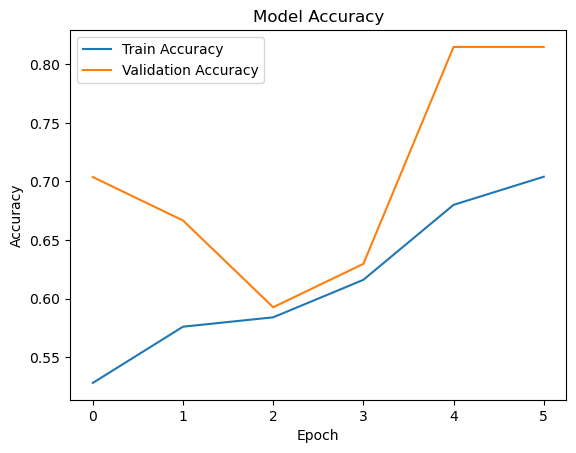

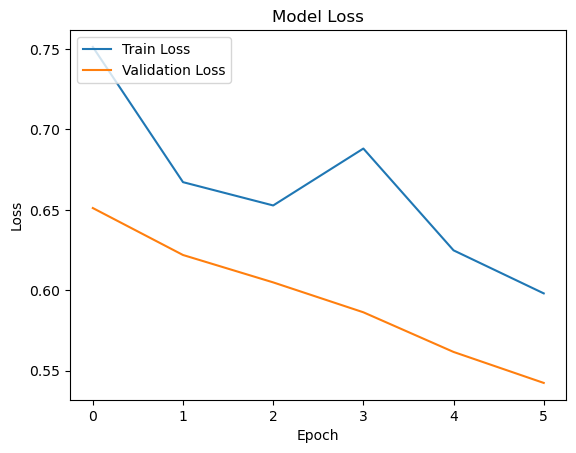

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_transfer.history['accuracy'] + history_transfer_more_epochs.history['accuracy'], label='Train Accuracy')
plt.plot(history_transfer.history['val_accuracy'] + history_transfer_more_epochs.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history_transfer.history['loss'] + history_transfer_more_epochs.history['loss'], label='Train Loss')
plt.plot(history_transfer.history['val_loss'] + history_transfer_more_epochs.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [38]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7037 - loss: 0.5593
Test Accuracy: 70.37%
Test Loss: 0.5593


In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze more layers for fine-tuning (e.g., last 8 layers)
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Add custom classification layers on top of the VGG16 base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Increased dense layer size
model.add(layers.Dropout(0.5))  # Regularization to prevent overfitting
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model with a lower learning rate and a fine-tuning optimizer
model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),  # Reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history_finetune = model.fit(
    datagen.flow(train_data, train_labels, batch_size=32),  # Data augmentation
    epochs=30,  # Continue training for more epochs
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set after fine-tuning more layers
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy after fine-tuning: {test_accuracy * 100:.2f}%")
print(f"Test Loss after fine-tuning: {test_loss:.4f}")


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 59s 13s/step - accuracy: 0.5147 - loss: 0.8194 - val_accuracy: 0.6667 - val_loss: 0.6184
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 71s 17s/step - accuracy: 0.5320 - loss: 0.7829 - val_accuracy: 0.7407 - val_loss: 0.5871
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 67s 15s/step - accuracy: 0.6216 - loss: 0.6966 - val_accuracy: 0.8148 - val_loss: 0.5597
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8148 - loss: 0.5652
Test Accuracy after fine-tuning: 81.48%
Test Loss after fine-tuning: 0.5652


In [40]:
# Try a different optimizer, such as RMSprop or SGD with momentum
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Increase batch size to 64 or 128 for more stable training
history_hyperparam_tuning = model.fit(
    datagen.flow(train_data, train_labels, batch_size=64),  # Increased batch size
    epochs=30,  # Continue training for more epochs
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)

# Evaluate on test set again
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy after hyperparameter tuning: {test_accuracy * 100:.2f}%")
print(f"Test Loss after hyperparameter tuning: {test_loss:.4f}")


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 88s 45s/step - accuracy: 0.6239 - loss: 0.6587 - val_accuracy: 0.7407 - val_loss: 0.5499
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 52s 26s/step - accuracy: 0.6189 - loss: 0.6569 - val_accuracy: 0.7778 - val_loss: 0.5169
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 23s/step - accuracy: 0.7301 - loss: 0.5405 - val_accuracy: 0.7407 - val_loss: 0.5328
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7778 - loss: 0.5376
Test Accuracy after hyperparameter tuning: 77.78%
Test Loss after hyperparameter tuning: 0.5376


In [42]:
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create the VGG16 model with custom layers
vgg_model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the VGG16 model
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the VGG16 model
vgg_model.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=30, validation_data=(val_data, val_labels))

# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create the ResNet50 model with custom layers
resnet_model = models.Sequential([
    resnet_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the ResNet50 model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ResNet50 model
resnet_model.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=30, validation_data=(val_data, val_labels))

# Make predictions from both models
vgg_preds = vgg_model.predict(test_data)
resnet_preds = resnet_model.predict(test_data)

# Ensemble the predictions using soft voting (average the probabilities)
ensemble_preds = (vgg_preds + resnet_preds) / 2

# Convert probabilities to binary labels (0 or 1)
ensemble_labels = (ensemble_preds > 0.5).astype(int)

# Evaluate ensemble accuracy
ensemble_accuracy = np.mean(ensemble_labels.flatten() == test_labels.flatten())
print(f"Test Accuracy with Ensemble: {ensemble_accuracy * 100:.2f}%")


Epoch 1/30


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 60s 13s/step - accuracy: 0.5522 - loss: 1.6584 - val_accuracy: 0.4815 - val_loss: 2.4944
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 12s/step - accuracy: 0.4907 - loss: 1.3266 - val_accuracy: 0.4815 - val_loss: 0.6935
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 63s 16s/step - accuracy: 0.4949 - loss: 0.6945 - val_accuracy: 0.4815 - val_loss: 0.6916
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 19s/step - accuracy: 0.6170 - loss: 0.6997 - val_accuracy: 0.5185 - val_loss: 0.7913
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 59s 15s/step - accuracy: 0.5149 - loss: 0.7451 - val_accuracy: 0.6667 - val_loss: 0.6772
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 20s/step - accuracy: 0.5272 - loss: 0.8791 - val_accuracy: 0.4815 - val_loss: 0.7189
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 18s/step - accuracy: 0.5286 - loss: 0.7106 - val_accuracy: 0.5185 - val_loss: 0.6865
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.5119 - loss: 0.8533 - val_accuracy: 0.5185 - val_loss: 0.6899
Epoch 9/30


In [43]:
# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze the last few layers for fine-tuning
for layer in resnet_model.layers[-8:]:
    layer.trainable = True

# Add custom classification layers
resnet_model = models.Sequential([
    resnet_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the ResNet50 model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ResNet50 model
history_resnet = resnet_model.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=30, validation_data=(val_data, val_labels))

# Evaluate the fine-tuned ResNet50 model on the test set
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_data, test_labels)
print(f"Test Accuracy for fine-tuned ResNet50: {test_accuracy_resnet * 100:.2f}%")
print(f"Test Loss for fine-tuned ResNet50: {test_loss_resnet:.4f}")


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 107s 11s/step - accuracy: 0.5831 - loss: 2.8690 - val_accuracy: 0.4815 - val_loss: 34.4216
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 52s 8s/step - accuracy: 0.7124 - loss: 2.9865 - val_accuracy: 0.5185 - val_loss: 280.7693
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - accuracy: 0.8316 - loss: 0.9980 - val_accuracy: 0.5185 - val_loss: 2803.6411
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 65s 15s/step - accuracy: 0.8236 - loss: 0.7454 - val_accuracy: 0.5185 - val_loss: 94959.7422
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 10s/step - accuracy: 0.9028 - loss: 0.5454 - val_accuracy: 0.5185 - val_loss: 756266.7500
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.8549 - loss: 0.3659 - val_accuracy: 0.5185 - val_loss: 188271.8906
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.8287 - loss: 0.4475 - val_accuracy: 0.5185 - val_loss: 835.2892
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.7842 - loss: 0.7785 - val_accuracy: 0.5185 -

In [44]:
from tensorflow.keras.optimizers import Adam

# Compile with a lower learning rate
resnet_model.compile(optimizer=Adam(learning_rate=0.000001),  # Very low learning rate
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with early stopping
history_resnet = resnet_model.fit(
    datagen.flow(train_data, train_labels, batch_size=32),
    epochs=30,
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.9525 - loss: 0.1436 - val_accuracy: 0.4815 - val_loss: 21.1544
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9310 - loss: 0.1135 - val_accuracy: 0.4815 - val_loss: 19.4868
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.9653 - loss: 0.0630 - val_accuracy: 0.4815 - val_loss: 18.1129
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.9641 - loss: 0.1294 - val_accuracy: 0.4815 - val_loss: 16.9936
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.9594 - loss: 0.1110 - val_accuracy: 0.4815 - val_loss: 15.8803
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.9557 - loss: 0.1612 - val_accuracy: 0.4815 - val_loss: 14.8204
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.9536 - loss: 0.1582 - val_accuracy: 0.4815 - val_loss: 13.7327
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - accuracy: 0.9285 - loss: 0.1986 - val_accuracy: 0.4815 - val_loss: 12.7331


In [46]:
# Modify the model to include additional dropout layers
resnet_model = models.Sequential([
    resnet_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),  # Increase dropout rate
    layers.Dense(1, activation='sigmoid')
])


ENDING EXPERIMENTING WITH OTHER MODELS, RETURNING TO VGG16 MODEL TO FINE TUNE THIS MODEL......

In [47]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze the last 10 layers for further fine-tuning
for layer in vgg_model.layers[-10:]:
    layer.trainable = True

# Add custom classification layers
vgg_model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with a lower learning rate
vgg_model.compile(optimizer=Adam(learning_rate=0.00001),  # Small learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the fine-tuned VGG16 model with data augmentation
history_vgg_finetune = vgg_model.fit(
    datagen.flow(train_data, train_labels, batch_size=32),
    epochs=30,
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(test_data, test_labels)
print(f"Test Accuracy for fine-tuned VGG16: {test_accuracy_vgg * 100:.2f}%")
print(f"Test Loss for fine-tuned VGG16: {test_loss_vgg:.4f}")


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 60s 13s/step - accuracy: 0.4833 - loss: 0.7696 - val_accuracy: 0.6667 - val_loss: 0.6326
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 12s/step - accuracy: 0.5960 - loss: 0.6943 - val_accuracy: 0.7037 - val_loss: 0.5967
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 12s/step - accuracy: 0.6756 - loss: 0.6172 - val_accuracy: 0.7778 - val_loss: 0.5613
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 12s/step - accuracy: 0.5834 - loss: 0.7004 - val_accuracy: 0.7778 - val_loss: 0.5261
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 12s/step - accuracy: 0.5997 - loss: 0.6506 - val_accuracy: 0.7778 - val_loss: 0.5035
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step - accuracy: 0.7527 - loss: 0.5040 - val_accuracy: 0.8519 - val_loss: 0.4587
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step - accuracy: 0.7435 - loss: 0.5294 - val_accuracy: 0.8519 - val_loss: 0.4263
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step - accuracy: 0.7689 - loss: 0.4917 - val_accuracy: 0.8148 - val_loss: 0.4095


In [49]:
# Save the fine-tuned VGG16 model in the recommended native Keras format
vgg_model.save('fine_tuned_vgg16_model.keras')


In [50]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Modify the model by reducing dropout and adding L2 regularization
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze more layers for fine-tuning
for layer in vgg_model.layers[-10:]:
    layer.trainable = True

# Add new custom layers with reduced dropout and L2 regularization
vgg_model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    layers.Dropout(0.3),  # Reduced dropout from 0.5 to 0.3
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile with a smaller learning rate
vgg_model.compile(optimizer=Adam(learning_rate=0.000001),  # Further reduce learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the fine-tuned VGG16 model with the modified settings
history_vgg_finetune = vgg_model.fit(
    datagen.flow(train_data, train_labels, batch_size=64),  # Increased batch size
    epochs=30,
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(test_data, test_labels)
print(f"Test Accuracy after further fine-tuning: {test_accuracy_vgg * 100:.2f}%")
print(f"Test Loss after further fine-tuning: {test_loss_vgg:.4f}")


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 88s 47s/step - accuracy: 0.6087 - loss: 0.9354 - val_accuracy: 0.5556 - val_loss: 0.9352
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 77s 32s/step - accuracy: 0.5537 - loss: 0.9856 - val_accuracy: 0.5556 - val_loss: 0.9301
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 72s 35s/step - accuracy: 0.5394 - loss: 0.9354 - val_accuracy: 0.5185 - val_loss: 0.9263
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 66s 32s/step - accuracy: 0.5240 - loss: 0.9518 - val_accuracy: 0.5185 - val_loss: 0.9232
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 77s 47s/step - accuracy: 0.6400 - loss: 0.9042 - val_accuracy: 0.5185 - val_loss: 0.9196
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 158s 74s/step - accuracy: 0.6034 - loss: 0.9600 - val_accuracy: 0.5185 - val_loss: 0.9160
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 88s 41s/step - accuracy: 0.5505 - loss: 0.9696 - val_accuracy: 0.5556 - val_loss: 0.9127
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 67s 32s/step - accuracy: 0.5400 - loss: 0.9501 - val_accuracy: 0.5926 - val_loss: 0.9098

In [51]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Modify the model by reverting to a higher dropout and lowering L2 regularization
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze more layers for fine-tuning
for layer in vgg_model.layers[-10:]:
    layer.trainable = True

# Add new custom layers with higher dropout and reduced L2 regularization
vgg_model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),  # Reduced L2 regularization
    layers.Dropout(0.5),  # Restore dropout rate to 0.5
    layers.Dense(1, activation='sigmoid')
])

# Compile with a slightly higher learning rate
vgg_model.compile(optimizer=Adam(learning_rate=0.00001),  # Slightly higher learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the fine-tuned VGG16 model
history_vgg_finetune = vgg_model.fit(
    datagen.flow(train_data, train_labels, batch_size=32),  # Reduce batch size back to 32
    epochs=30,
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(test_data, test_labels)
print(f"Test Accuracy after further fine-tuning: {test_accuracy_vgg * 100:.2f}%")
print(f"Test Loss after further fine-tuning: {test_loss_vgg:.4f}")


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 76s 14s/step - accuracy: 0.5215 - loss: 1.0703 - val_accuracy: 0.5185 - val_loss: 0.8146
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 13s/step - accuracy: 0.5611 - loss: 0.7976 - val_accuracy: 0.6667 - val_loss: 0.7730
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 13s/step - accuracy: 0.5026 - loss: 0.8866 - val_accuracy: 0.5556 - val_loss: 0.7703
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step - accuracy: 0.6334 - loss: 0.7814 - val_accuracy: 0.7037 - val_loss: 0.7287
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 12s/step - accuracy: 0.6398 - loss: 0.7657 - val_accuracy: 0.8519 - val_loss: 0.7004
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 13s/step - accuracy: 0.6415 - loss: 0.7753 - val_accuracy: 0.8148 - val_loss: 0.6840
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step - accuracy: 0.6460 - loss: 0.7382 - val_accuracy: 0.8519 - val_loss: 0.6647
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 12s/step - accuracy: 0.6570 - loss: 0.7491 - val_accuracy: 0.8519 - val_loss: 0.6445


In [52]:
# Adjust the threshold for tumor detection
predictions = vgg_model.predict(test_data)
threshold = 0.3  # Lower threshold for favoring recall
adjusted_predictions = (predictions > threshold).astype(int)

# Evaluate recall, precision, and other metrics
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_labels, adjusted_predictions))
print(confusion_matrix(test_labels, adjusted_predictions))



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.85      0.85      0.85        13

    accuracy                           0.85        27
   macro avg       0.85      0.85      0.85        27
weighted avg       0.85      0.85      0.85        27

[[12  2]
 [ 2 11]]


In [53]:
# Install if necessary
!pip install focal-loss



  Obtaining dependency information for focal-loss from https://files.pythonhosted.org/packages/3a/a1/e362a8b955a417a6b37ae31088ecc3ad0fc31b50265c0924a969487eacf6/focal_loss-0.0.7-py3-none-any.whl.metadata


In [54]:
from focal_loss import BinaryFocalLoss

# Compile the model with Focal Loss
vgg_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss=BinaryFocalLoss(gamma=2),  # Use Focal Loss
    metrics=['accuracy']
)


In [55]:
# Get predictions on the test set
test_predictions = vgg_model.predict(test_data)

# Adjust the threshold if needed (for example, using 0.5 as the default)
threshold = 0.5
adjusted_test_predictions = (test_predictions > threshold).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
print(classification_report(test_labels, adjusted_test_predictions))

# Optionally, print the confusion matrix to get detailed insights
print(confusion_matrix(test_labels, adjusted_test_predictions))


              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.89      0.62      0.73        13

    accuracy                           0.78        27
   macro avg       0.81      0.77      0.77        27
weighted avg       0.80      0.78      0.77        27

[[13  1]
 [ 5  8]]


In [58]:
vgg_model.save('best_vgg16_model.h5')
